[000]  m = 32.42, b = 13123.04, loss: 13584833832.085768
[001]  m = 50.75, b = 21226.32, loss: 6499897083.318188
[002]  m = 63.02, b = 26641.88, loss: 3332267011.836895
[003]  m = 71.22, b = 30260.34, loss: 1916011462.030930
[004]  m = 76.70, b = 32677.22, loss: 1282781038.128830
[005]  m = 80.37, b = 34290.71, loss: 999640934.866587
[006]  m = 82.82, b = 35367.03, loss: 873030253.463436
[007]  m = 84.46, b = 36084.21, loss: 816408425.433698
[008]  m = 85.56, b = 36561.28, loss: 791082467.799206
[009]  m = 86.30, b = 36877.82, loss: 779751825.784220
[010]  m = 86.80, b = 37087.05, loss: 774680603.819336
[011]  m = 87.13, b = 37224.55, loss: 772409448.850248
[012]  m = 87.35, b = 37314.10, loss: 771391222.526459
[013]  m = 87.50, b = 37371.62, loss: 770933874.851306
[014]  m = 87.60, b = 37407.74, loss: 770727766.930438
[015]  m = 87.67, b = 37429.57, loss: 770634307.436477
[016]  m = 87.72, b = 37441.87, loss: 770591429.876973
[017]  m = 87.75, b = 37447.82, loss: 770571315.710378
[018

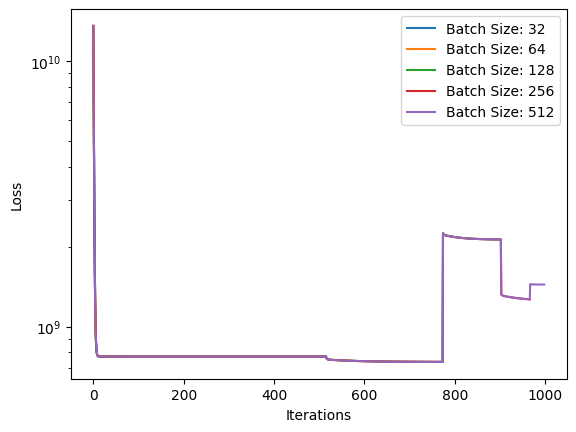

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to update slope (m)
def updated_m(x,y,m,b,learning_rate):
    return m - learning_rate * np.mean((m*x + b - y) * x)

# Function to update intercept (b)
def updated_b(x,y,m,b,learning_rate):
    return b - learning_rate * np.mean(m*x + b - y)

# Loss function
def loss(x,y,m,b):
    return (m*x + b - y)**2

# Function to plot data
def plot_data(x,y,m,b,ax):
    ax.plot(x,y,'r.',label='data')

# Read data
data = pd.read_csv("slimmed_realestate_data.csv")

# Initial parameters
m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1
loss_history = []

# Different batch sizes to try
batch_sizes = [32, 64, 128, 256, 512]

for batch_size in batch_sizes:
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    loop_N = 30 * len(data) // batch_size

    for i in range(loop_N):
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)
        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_history.append(loss_value)
        print('[%03d]  m = %.2f, b = %.2f, loss: %f' % (i, m, b, loss_value))

    plt.plot(loss_history, label=f'Batch Size: {batch_size}')

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
